In [1]:
library(ggplot2)
library('rpart')
library('rattle')
library('rpart.plot')
library('RColorBrewer')
library('GGally')
library(randomForest)

Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:rattle’:

    importance

The following object is masked from ‘package:ggplot2’:

    margin



In [44]:
data=read.csv("~/Downloads/LoanStats3b.csv",skip=1,stringsAsFactors = FALSE,na.omit)

In [45]:
summary(data)

      id            member_id        loan_amnt      funded_amnt   
 Length:188183      Mode:logical   Min.   : 1000   Min.   : 1000  
 Class :character   NA's:188183    1st Qu.: 8000   1st Qu.: 8000  
 Mode  :character                  Median :12175   Median :12125  
                                   Mean   :14354   Mean   :14352  
                                   3rd Qu.:20000   3rd Qu.:20000  
                                   Max.   :35000   Max.   :35000  
                                   NA's   :2       NA's   :2      
 funded_amnt_inv     term             int_rate          installment     
 Min.   :  950   Length:188183      Length:188183      Min.   :   4.93  
 1st Qu.: 8000   Class :character   Class :character   1st Qu.: 269.98  
 Median :12100   Mode  :character   Mode  :character   Median : 398.21  
 Mean   :14340                                         Mean   : 443.73  
 3rd Qu.:19975                                         3rd Qu.: 578.31  
 Max.   :35000            

In [117]:
data=data.frame(data)
d1=subset.data.frame(data,data$loan_status == 'Charged Off' | data$loan_status == 'Fully Paid')
d1_short=d1[c(1:1000),c(3:28)]
sum(d1$loan_amnt[which(d1$grade == 'A')])
sum(d1$loan_amnt[which(d1$grade == 'B')])
sum(d1$loan_amnt[which(d1$grade == 'C')])
sum(d1$loan_amnt[which(d1$grade == 'D')])
sum(d1$loan_amnt[which(d1$grade == 'E')])
sum(d1$loan_amnt[which(d1$grade == 'F')])

ggplot(d1,aes(loan_amnt,color=grade)) + geom_box(position="dodge")

[1] 13378050

[1] 21539400

[1] 19753250

[1] 12829375

[1] 5170050

[1] 1915850

ERROR: Error in geom_box(position = "dodge"): could not find function "geom_box"


In [47]:
summary(d1_short)

   loan_amnt      funded_amnt    funded_amnt_inv     term          
 Min.   : 1000   Min.   : 1000   Min.   : 1000   Length:1000       
 1st Qu.: 8000   1st Qu.: 8000   1st Qu.: 8000   Class :character  
 Median :12000   Median :12000   Median :12000   Mode  :character  
 Mean   :13995   Mean   :13995   Mean   :13988                     
 3rd Qu.:18231   3rd Qu.:18231   3rd Qu.:18206                     
 Max.   :35000   Max.   :35000   Max.   :35000                     
   int_rate          installment         grade            sub_grade        
 Length:1000        Min.   :  36.28   Length:1000        Length:1000       
 Class :character   1st Qu.: 273.35   Class :character   Class :character  
 Mode  :character   Median : 381.04   Mode  :character   Mode  :character  
                    Mean   : 440.28                                        
                    3rd Qu.: 560.24                                        
                    Max.   :1406.45                                 

In [48]:
summary(d1)

      id            member_id        loan_amnt      funded_amnt   
 Length:182110      Mode:logical   Min.   : 1000   Min.   : 1000  
 Class :character   NA's:182110    1st Qu.: 8000   1st Qu.: 8000  
 Mode  :character                  Median :12000   Median :12000  
                                   Mean   :14161   Mean   :14158  
                                   3rd Qu.:20000   3rd Qu.:20000  
                                   Max.   :35000   Max.   :35000  
                                                                  
 funded_amnt_inv     term             int_rate          installment     
 Min.   :  950   Length:182110      Length:182110      Min.   :   4.93  
 1st Qu.: 8000   Class :character   Class :character   1st Qu.: 267.06  
 Median :12000   Mode  :character   Mode  :character   Median : 393.67  
 Mean   :14146                                         Mean   : 441.59  
 3rd Qu.:19750                                         3rd Qu.: 576.29  
 Max.   :35000            

In [49]:
summary(d1$title)

   Length     Class      Mode 
   182110 character character 

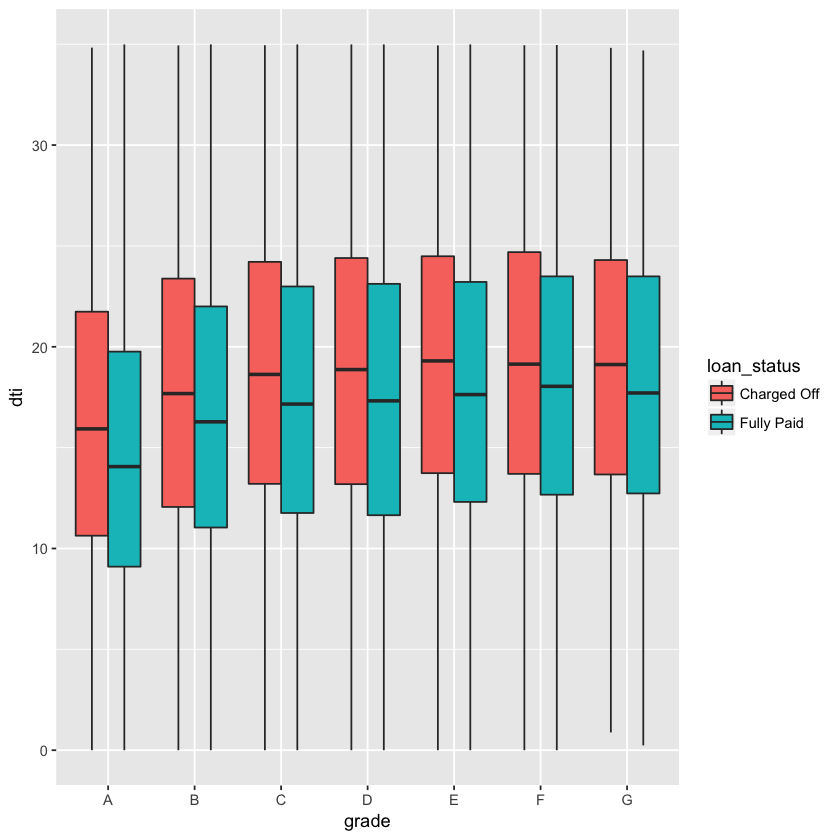

In [102]:
ggplot(d1,aes(grade,dti,fill=loan_status)) + geom_boxplot()

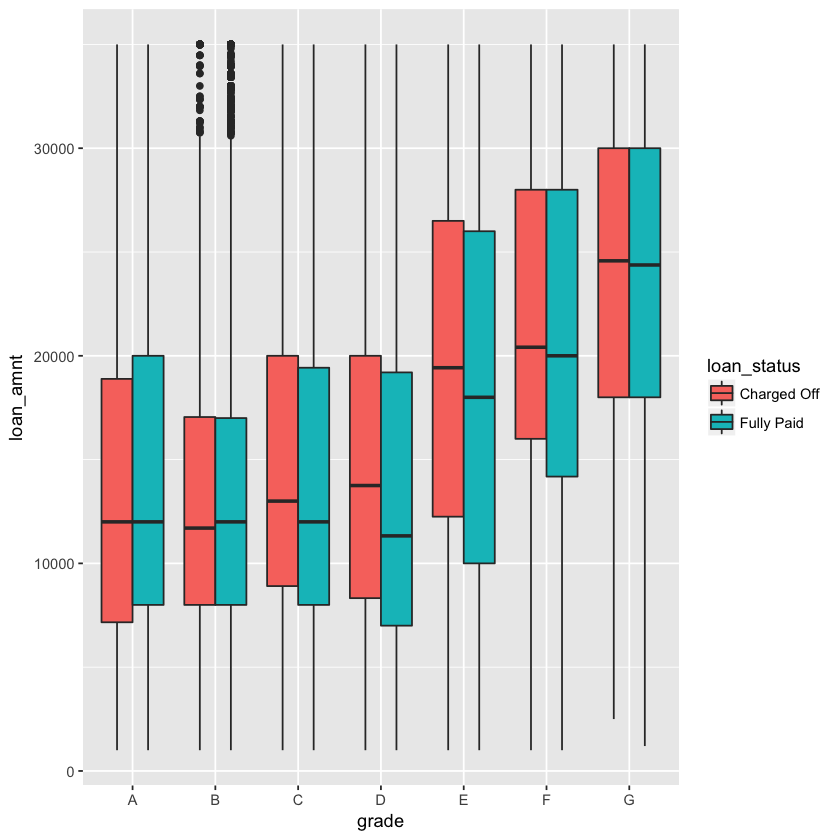

In [110]:
ggplot(d1,aes(grade,loan_amnt,fill=loan_status)) + geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


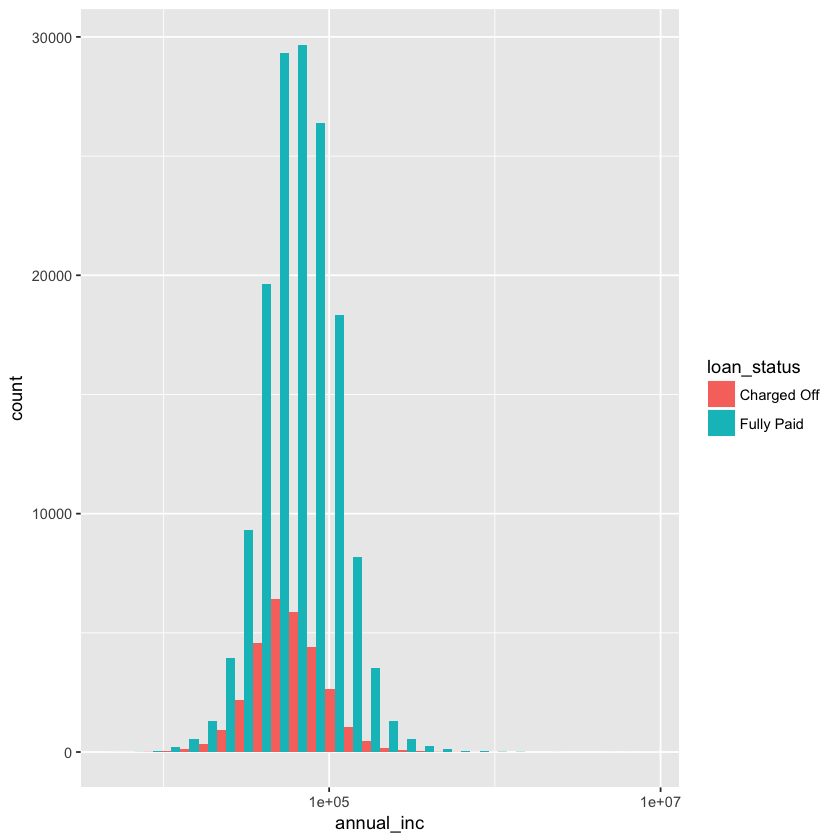

In [50]:
ggplot(d1,aes(annual_inc,fill=loan_status)) + geom_histogram(position="dodge") + scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


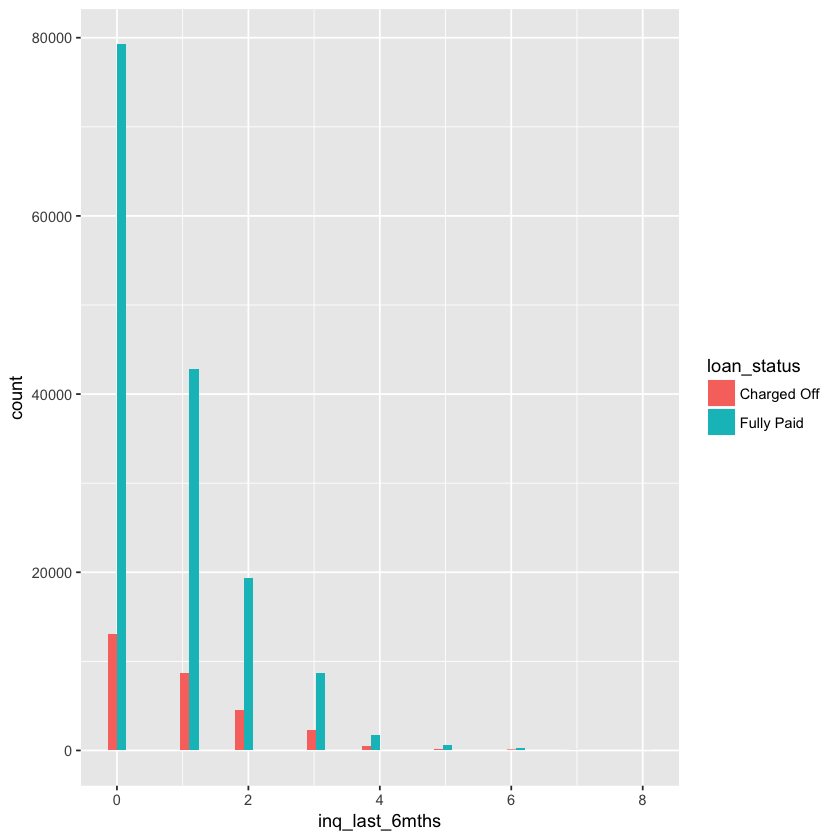

In [14]:
ggplot(d1,aes(inq_last_6mths,fill=loan_status)) + geom_histogram(position="dodge") 

In [59]:
df=data.frame(loan_status=d1$loan_status,
              loan_amnt=d1$loan_amnt,
              grade=d1$grade,
              annual_inc=d1$annual_inc,
              dti=d1$dti,
              inqu_last_6mths=d1$inq_last_6mths,
              emp_length=d1$emp_length)

my_tree=rpart(formula = loan_status ~ loan_amnt + 
              grade +
              annual_inc +
              dti,
             data=df,
             method='class')


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


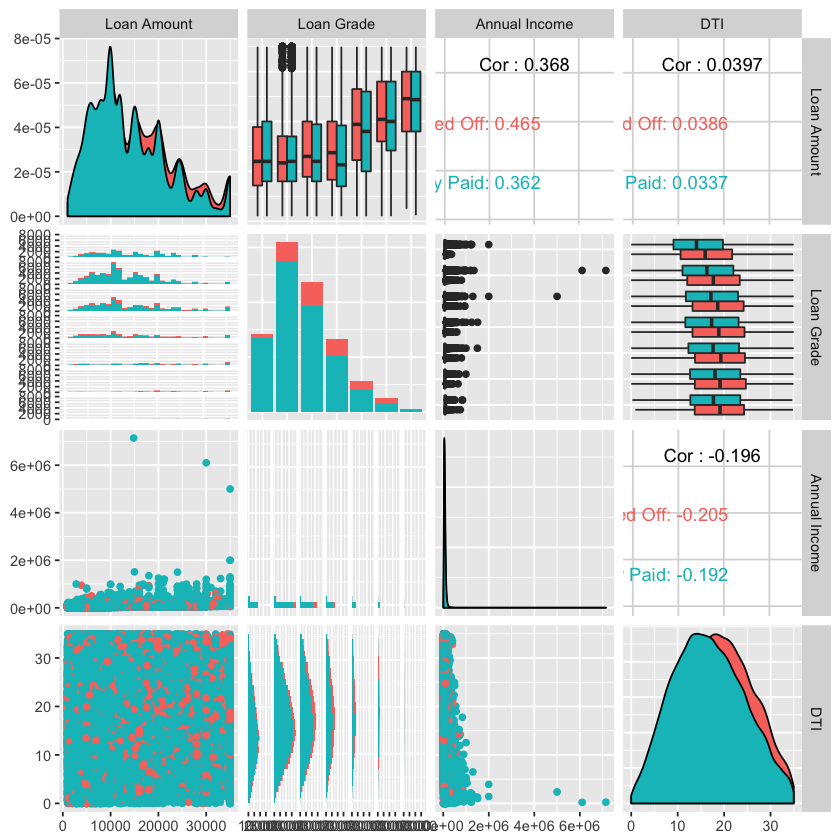

In [52]:
ggpairs(df, columns = 2:5, ggplot2::aes(colour=loan_status),
       columnLabels=c("Loan Amount","Loan Grade","Annual Income","DTI")) 

In [65]:
my_tree=rpart(formula = as.factor(loan_status) ~ ., data=df,
             method='class')

In [66]:
my_tree

n= 182110 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 182110 29358 Fully Paid (0.1612103 0.8387897) *

In [67]:
fancyRpartPlot(my_tree)

ERROR: Error in apply(model$frame$yval2[, yval2per], 1, function(x) x[1 + x[1]]): dim(X) must have a positive length


In [98]:
my_forest <- randomForest(as.factor(loan_status) ~ 
              loan_amnt + 
              grade +
              annual_inc +
              dti + 
              inqu_last_6mths + 
              emp_length,
            data=df,importance=TRUE)

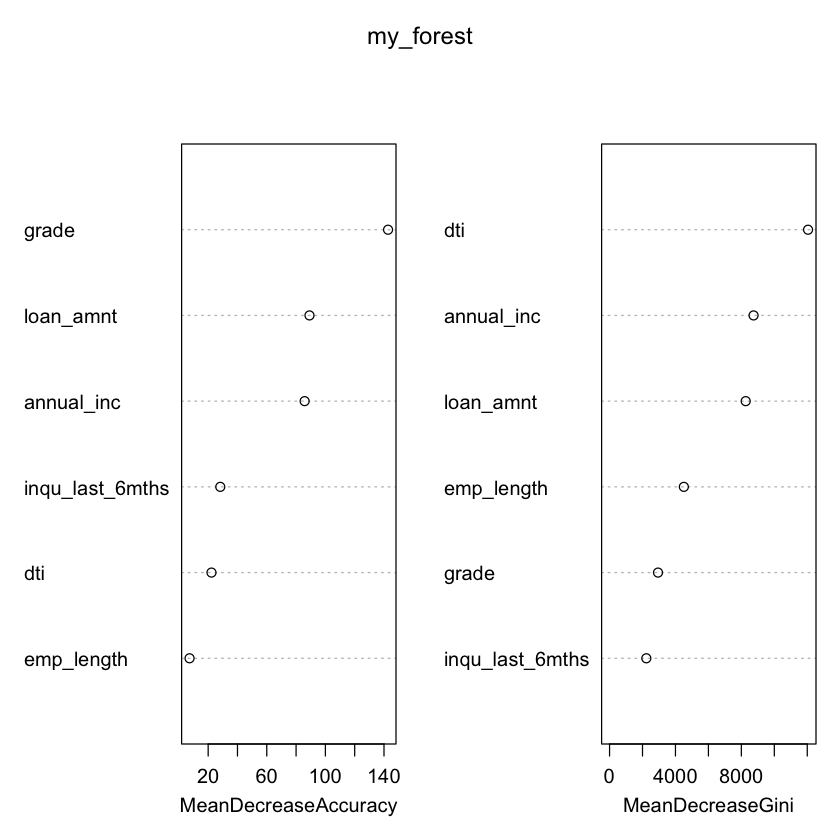

In [99]:
varImpPlot(my_forest)

In [101]:
library('reprtree')


ERROR: Error in library("reprtree"): there is no package called ‘reprtree’


In [97]:
my_forest <- randomForest(as.factor(loan_status) ~ .,
            data=d1_short,importance=TRUE)

ERROR: Error in na.fail.default(structure(list(`as.factor(loan_status)` = structure(c(2L, : missing values in object


In [75]:
data=read.csv("~/Downloads/LoanStats_2017Q4.csv",skip=1,stringsAsFactors = FALSE)

In [76]:
summary(data)

      id            member_id        loan_amnt      funded_amnt   
 Length:118650      Mode:logical   Min.   : 1000   Min.   : 1000  
 Class :character   NA's:118650    1st Qu.: 8000   1st Qu.: 8000  
 Mode  :character                  Median :12250   Median :12250  
                                   Mean   :15317   Mean   :15317  
                                   3rd Qu.:20000   3rd Qu.:20000  
                                   Max.   :40000   Max.   :40000  
                                   NA's   :2       NA's   :2      
 funded_amnt_inv     term             int_rate          installment     
 Min.   :  975   Length:118650      Length:118650      Min.   :  30.12  
 1st Qu.: 7975   Class :character   Class :character   1st Qu.: 239.52  
 Median :12250   Mode  :character   Mode  :character   Median : 369.00  
 Mean   :15312                                         Mean   : 447.89  
 3rd Qu.:20000                                         3rd Qu.: 602.90  
 Max.   :40000            

In [81]:
df2=data.frame(loan_amnt=data$loan_amnt,
              grade=data$grade,
              annual_inc=data$annual_inc,
              dti=data$dti,
              inqu_last_6mths=data$inq_last_6mths,
              emp_length=data$emp_length)

In [96]:
df2$loan_amnt[which(is.na(df2$loan_amnt))]=0
df$annual_inc[which(is.na(df2$annual_inc))]=0
df2$dti[which(is.na(df2$dti))]=0
df2$inqu_last_6mths[which(is.na(df2$inqu_last_6mths))]=0
df2$loan_status=df2$loan_amnt*0

summary(df2)
summary(df)

   loan_amnt         grade         annual_inc           dti        
 Min.   :    0   B      :36832   Min.   :      0   Min.   :  0.00  
 1st Qu.: 8000   C      :32419   1st Qu.:  45000   1st Qu.: 11.21  
 Median :12250   A      :25126   Median :  65000   Median : 17.59  
 Mean   :15317   D      :17866   Mean   :  78764   Mean   : 19.43  
 3rd Qu.:20000   E      : 4720   3rd Qu.:  95000   3rd Qu.: 24.98  
 Max.   :40000   F      : 1214   Max.   :8000000   Max.   :999.00  
                 (Other):  473   NA's   :2                         
 inqu_last_6mths      emp_length     loan_status
 Min.   :0.0000   10+ years:38085   Min.   :0   
 1st Qu.:0.0000   < 1 year :13029   1st Qu.:0   
 Median :0.0000   2 years  :10563   Median :0   
 Mean   :0.5043   n/a      : 9722   Mean   :0   
 3rd Qu.:1.0000   3 years  : 9253   3rd Qu.:0   
 Max.   :5.0000   1 year   : 7556   Max.   :0   
                  (Other)  :30442               

      loan_status       loan_amnt     grade       annual_inc     
 Charged Off: 29358   Min.   : 1000   A:28460   Min.   :      0  
 Fully Paid :152752   1st Qu.: 8000   B:61860   1st Qu.:  45000  
                      Median :12000   C:47437   Median :  62000  
                      Mean   :14161   D:26790   Mean   :  72058  
                      3rd Qu.:20000   E:11357   3rd Qu.:  86500  
                      Max.   :35000   F: 5204   Max.   :7141778  
                                      G: 1002                    
      dti        inqu_last_6mths      emp_length   
 Min.   : 0.00   Min.   :0.0000   10+ years:58592  
 1st Qu.:11.27   1st Qu.:0.0000   2 years  :15716  
 Median :16.71   Median :0.0000   5 years  :13896  
 Mean   :17.00   Mean   :0.8082   3 years  :13630  
 3rd Qu.:22.50   3rd Qu.:1.0000   < 1 year :12902  
 Max.   :34.99   Max.   :8.0000   6 years  :11613  
                                  (Other)  :55761  

In [85]:
table(df$emp_length)
table(df2$emp_length)


 < 1 year    1 year 10+ years   2 years   3 years   4 years   5 years   6 years 
    12902     11174     58592     15716     13630     10569     13896     11613 
  7 years   8 years   9 years       n/a 
    10848      8649      6885      7636 


           < 1 year    1 year 10+ years   2 years   3 years   4 years   5 years 
        2     13029      7556     38085     10563      9253      7240      6996 
  6 years   7 years   8 years   9 years       n/a 
     5083      4339      3223      3559      9722 

In [95]:
my_prediction <- predict(my_forest, df2)

ERROR: Error in predict.randomForest(my_forest, df2): New factor levels not present in the training data
